<h2 align="center">Deep Learning For Traffic Sign Classification</h2>

### Project Overview
---

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons
- Images are 32 x 32 pixels.
- Colored images consist of 3 RGB channels for red, green and blue colours.

### Import Libraries/Dataset
---

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle
import random

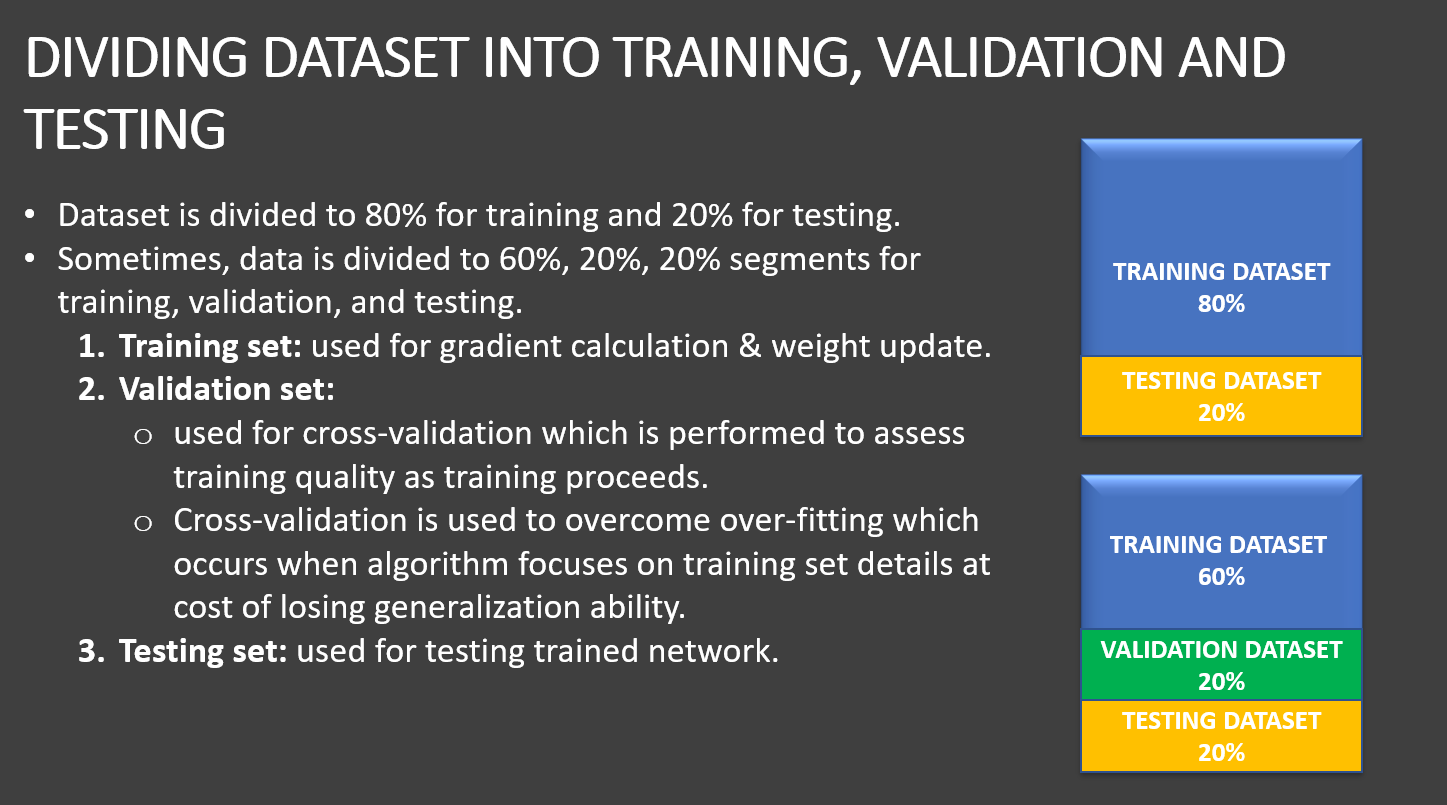

In [2]:
with open("traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


In [4]:
X_val, y_val = valid['features'], valid['labels']
print(X_val.shape)
print(y_val.shape)

(4410, 32, 32, 3)
(4410,)


In [5]:
X_test, y_test = test['features'], test['labels']
print(X_test.shape)
print(y_test.shape)

(12630, 32, 32, 3)
(12630,)


### Perform Images Visualization
---

14

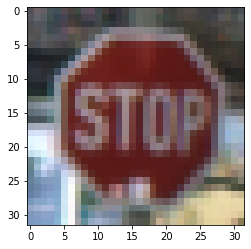

In [6]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

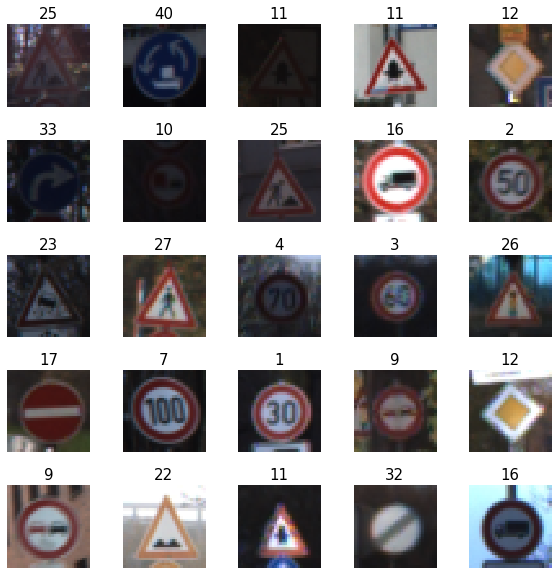

In [7]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

### Convert Images to Grayscale and Perform Normalization
---

In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [9]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims=True)
X_val_gray = np.sum(X_val/3, axis = 3, keepdims=True)

In [10]:
print(X_train_gray.shape)
print(X_test_gray.shape)
print(X_val_gray.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [11]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_val_gray_norm = (X_val_gray - 128)/128

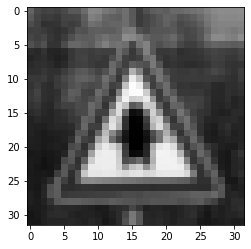

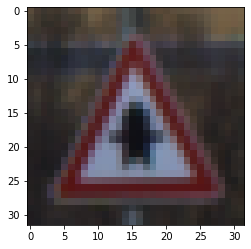

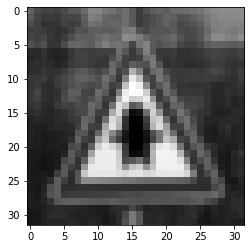

In [12]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray');

### Understand the Theory and Intuition behind CNN
----

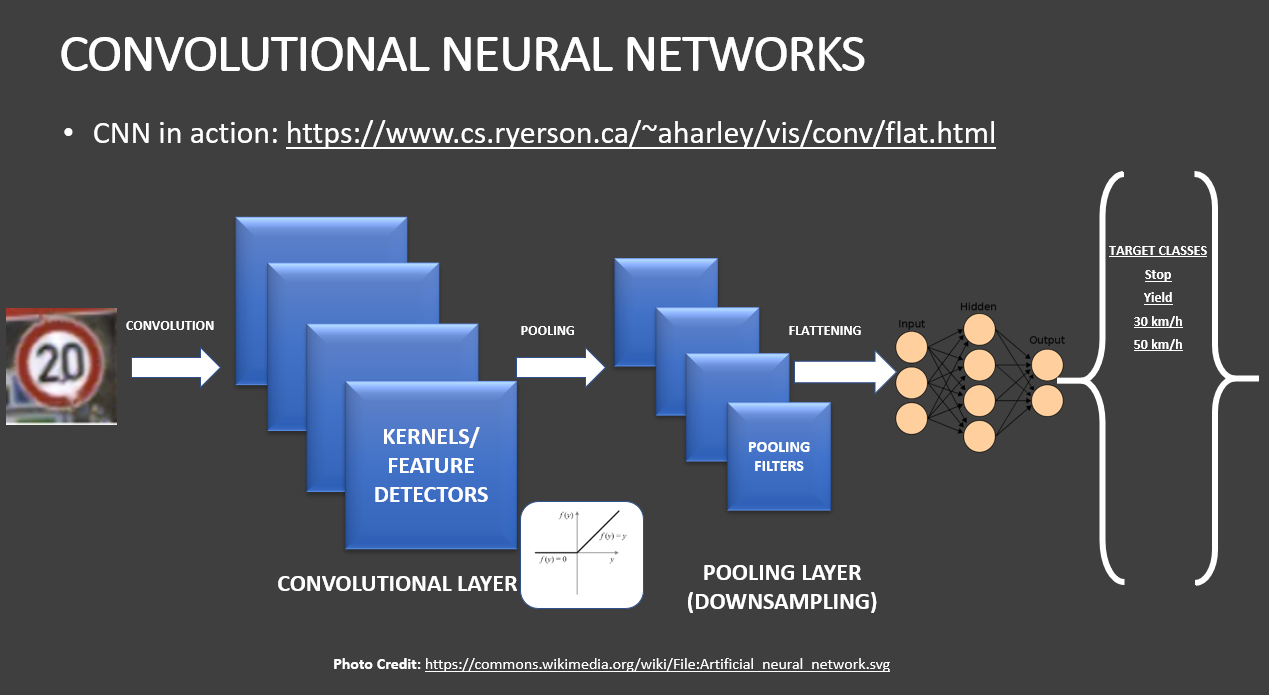

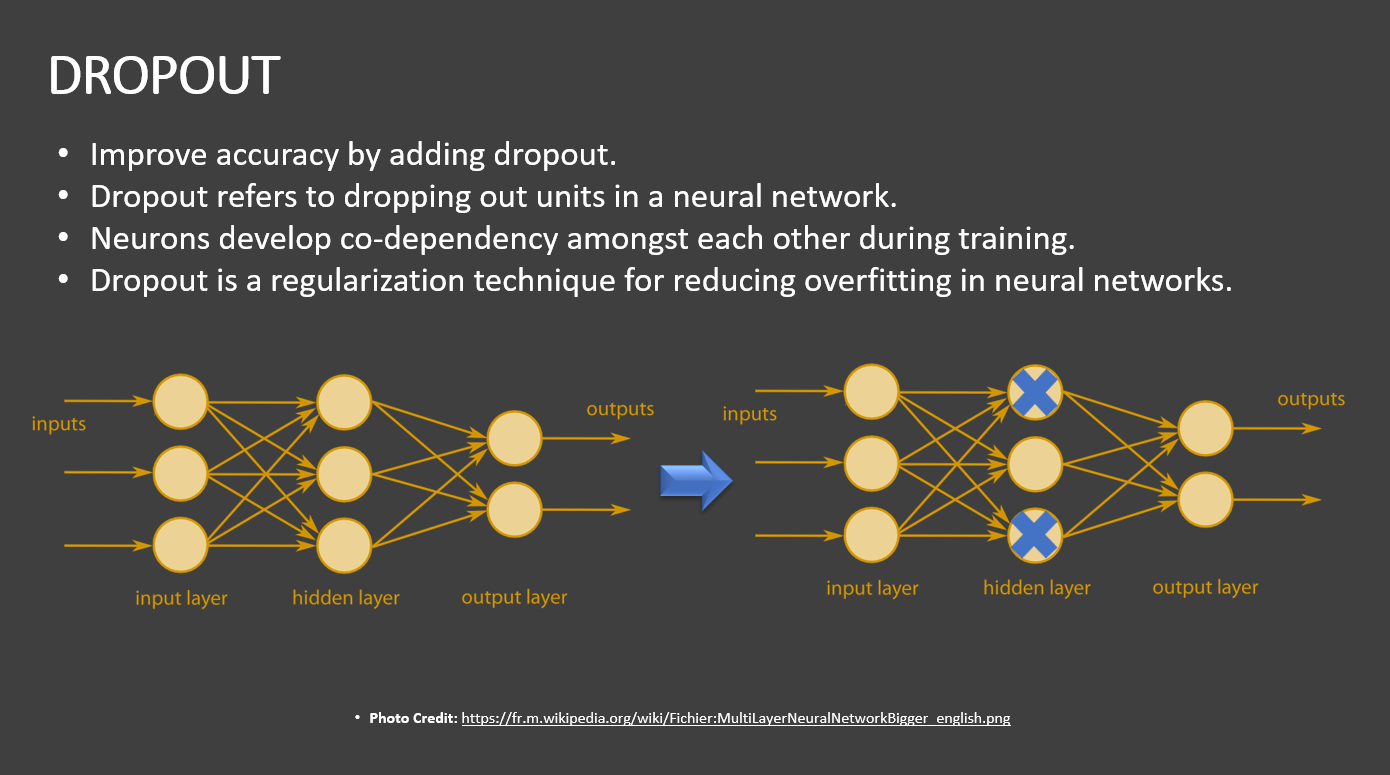

### Build Deep CNN Model
---

In [13]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape = (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5, 5), activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation='relu'))
CNN.add(layers.Dense(84, activation='relu'))
CNN.add(layers.Dense(43, activation='softmax'))

CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

### Compile and Train Deep CNN Model
---

In [14]:
CNN.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [15]:
history = CNN.fit(
    X_train_gray_norm,
    y_train,
    batch_size = 500,
    epochs = 25,
    verbose = 1,
    validation_data = (X_val_gray_norm, y_val)
)

Epoch 1/25
70/70 [==============================] - 10s 138ms/step - loss: 3.2766 - accuracy: 0.1437 - val_loss: 2.9979 - val_accuracy: 0.2188
Epoch 2/25
70/70 [==============================] - 8s 117ms/step - loss: 2.1876 - accuracy: 0.3950 - val_loss: 1.9089 - val_accuracy: 0.4653
Epoch 3/25
70/70 [==============================] - 8s 114ms/step - loss: 1.5257 - accuracy: 0.5604 - val_loss: 1.3892 - val_accuracy: 0.6057
Epoch 4/25
70/70 [==============================] - 8s 109ms/step - loss: 1.1343 - accuracy: 0.6657 - val_loss: 1.0284 - val_accuracy: 0.6902
Epoch 5/25
70/70 [==============================] - 7s 105ms/step - loss: 0.8490 - accuracy: 0.7496 - val_loss: 0.8127 - val_accuracy: 0.7551
Epoch 6/25
70/70 [==============================] - 7s 104ms/step - loss: 0.6903 - accuracy: 0.7973 - val_loss: 0.6777 - val_accuracy: 0.8113
Epoch 7/25
70/70 [==============================] - 8s 108ms/step - loss: 0.6008 - accuracy: 0.8240 - val_loss: 0.6494 - val_accuracy: 0.8068
Epoch

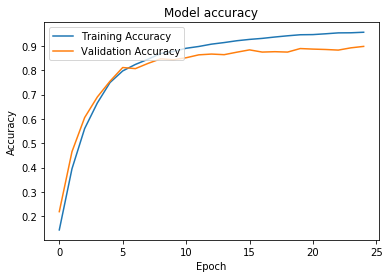

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

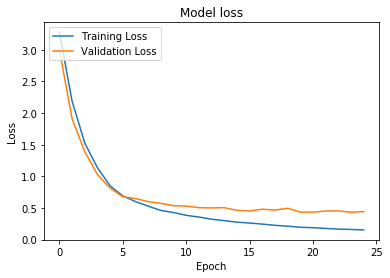

In [17]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left') 
plt.show()

### Assess trained CNN model Performance
---

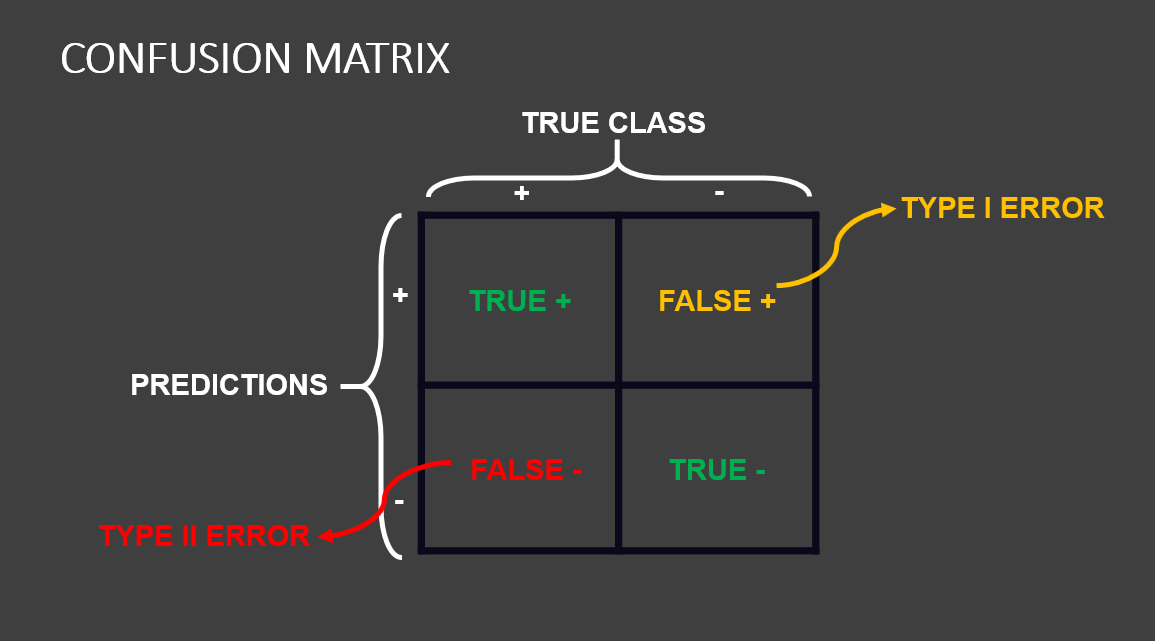

In [18]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 4ms/step - loss: 0.6345 - accuracy: 0.8803
Test Accuracy: 0.8802850246429443


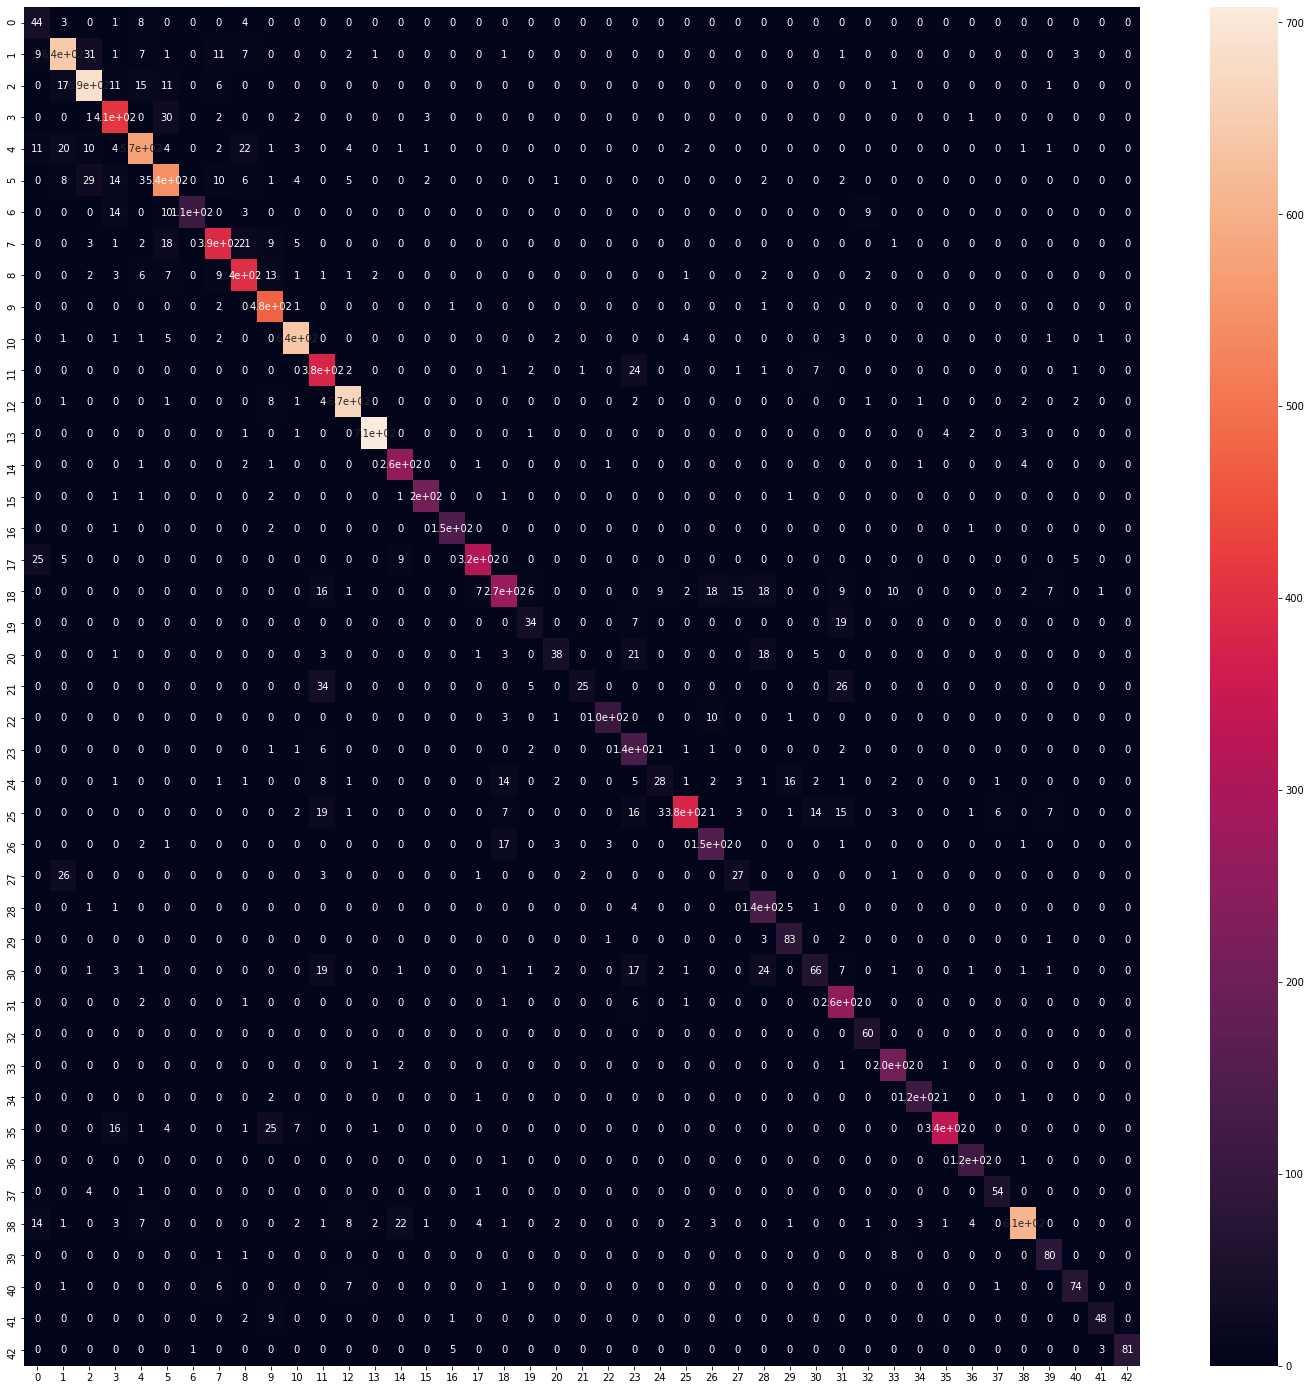

In [19]:
predicted_classes = np.argmax(CNN.predict(X_test_gray_norm), axis=-1)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

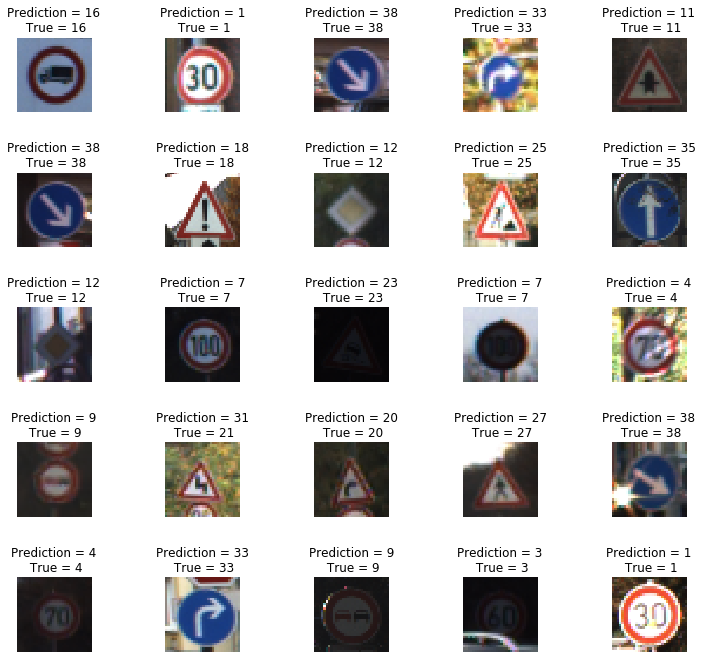

In [20]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    